# Analysing Performance of Stocks using Causal Discovery

## Setup

Import the datasets:

In [3]:
%%capture

! pip install --user kaggle

## Data Loading

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")

companyValues.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [37]:
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [41]:
companyValuesApple = companyValues[companyValues.ticker_symbol == 'AAPL']
tweetApple = tweet[tweet.ticker_symbol == 'AAPL']

In [43]:
companyValuesApple

(3085, 7)

In [42]:
tweetApple.shape

(1425013, 8)

In [34]:
tweet.body[0]

'lx21 made $10,008  on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO'

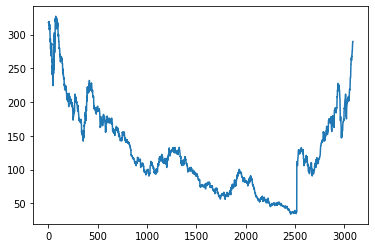

In [44]:
plt.plot(companyValuesApple.close_value)